### Summer 2024: Time Series Analysis

#### Final project - Create visualizations

This project creates visualizations for average annual salaries for earners who complete different education levels.
Education levels range from "Not a high school graduate" up to "Advanced degree".



**Load cleaned data**

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib

import pandas as pd

%matplotlib inline

In [43]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))

matplotlib: 3.8.3
pandas: 2.2.1


In [45]:
salaries_df = pd.read_csv('data/salary_clean.csv')
salaries_df.head()

,year,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
0,2021,165282,63050,10886,31050,43930,42850,44019,48070,41873,80380,24572,110600
1,2020,164611,72520,10985,35940,42240,39498,45240,44176,41910,73499,24236,104833
2,2019,167216,52380,11414,22810,42599,39371,46886,45091,42153,73163,24164,106766
3,2018,165179,64340,12058,31870,42882,38936,46887,43053,40231,71155,23118,99919
4,2017,163871,74320,12240,36980,42816,38145,47382,41507,39153,67763,22277,98369


#### Plot salary growth for each education category

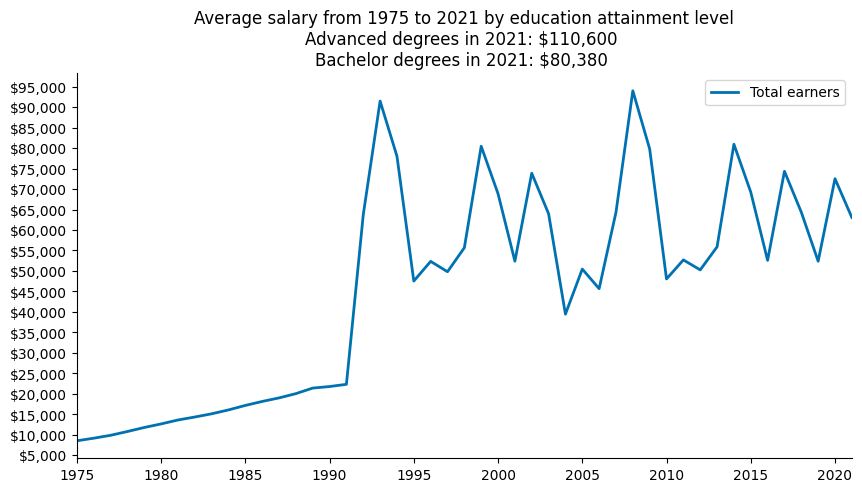

In [46]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(10,5))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(salaries_df['year'], salaries_df['total_earners_salary'], linestyle='solid', lw=2, label='Total earners')


    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Average salary from 1975 to 2021 by education attainment level\n" \
             f"Advanced degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['adv_salary'].iloc[0]:,} \n" \
             f"Bachelor degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['bachelors_salary'].iloc[0]:,} ")
    
    plt.legend();

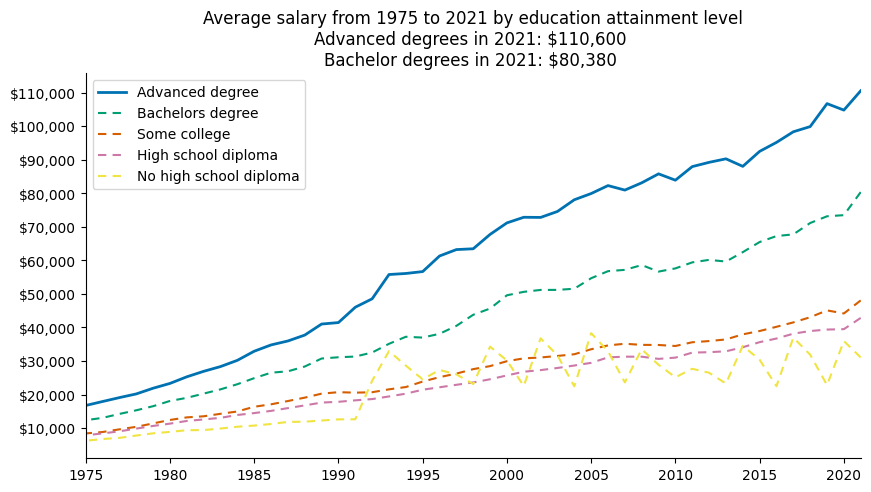

In [47]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(10,5))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(salaries_df['year'], salaries_df['adv_salary'], linestyle='solid', lw=2, label='Advanced degree')
    plt.plot(salaries_df['year'], salaries_df['bachelors_salary'], linestyle='--', dashes=(dash_len, space), label='Bachelors degree')
    plt.plot(salaries_df['year'], salaries_df['some_college_salary'], linestyle='--', dashes=(dash_len, space), label='Some college')
    plt.plot(salaries_df['year'], salaries_df['high_school_salary'], linestyle='--', dashes=(dash_len, space), label='High school diploma')
    plt.plot(salaries_df['year'], salaries_df['no_high_school_salary'], linestyle='--', dashes=(dash_len, space), label='No high school diploma')


    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Average salary from 1975 to 2021 by education attainment level\n" \
             f"Advanced degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['adv_salary'].iloc[0]:,} \n" \
             f"Bachelor degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['bachelors_salary'].iloc[0]:,} ")
    
    plt.legend();

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [19]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    47 non-null     int64
 1   total_earners           47 non-null     int64
 2   total_earners_salary    47 non-null     int64
 3   no_high_school_earners  47 non-null     int64
 4   no_high_school_salary   47 non-null     int64
 5   high_school_earners     47 non-null     int64
 6   high_school_salary      47 non-null     int64
 7   some_college_earners    47 non-null     int64
 8   some_college_salary     47 non-null     int64
 9   bachelors_earners       47 non-null     int64
 10  bachelors_salary        47 non-null     int64
 11  adv_earners             47 non-null     int64
 12  adv_salary              47 non-null     int64
dtypes: int64(13)
memory usage: 4.9 KB


Convert the year column from int to a date object, then set it as the dataframe's index

In [20]:
salaries_df['year'] = pd.to_datetime(salaries_df['year'], format='%Y')
salaries_df.set_index('year', inplace=True)
salaries_df.head()

,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
year,,,,,,,,,,,,
2021-01-01,165282,63050,10886,31050,43930,42850,44019,48070,41873,80380,24572,110600
2020-01-01,164611,72520,10985,35940,42240,39498,45240,44176,41910,73499,24236,104833
2019-01-01,167216,52380,11414,22810,42599,39371,46886,45091,42153,73163,24164,106766
2018-01-01,165179,64340,12058,31870,42882,38936,46887,43053,40231,71155,23118,99919
2017-01-01,163871,74320,12240,36980,42816,38145,47382,41507,39153,67763,22277,98369


Sort the dataframe so the older years come first

In [26]:
salaries_df.sort_index(inplace=True)
salaries_df.head()

,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
year,,,,,,,,,,,,
1975-01-01,97881,8552,24916,6198,39827,7843,16917,8388,9764,12332,6457,16725
1976-01-01,100510,9180,25035,6720,40570,8393,17786,8813,10132,13033,6985,17911
1977-01-01,103119,9887,24854,7066,41696,9013,18905,9607,10357,14207,7309,19077
1978-01-01,106436,10812,23787,7759,43510,9834,20121,10357,11001,15291,8017,20173
1979-01-01,110826,11795,23783,8420,45497,10624,21174,11377,11751,16514,8621,21874


In [22]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-01-01 to 1975-01-01
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   total_earners           47 non-null     int64
 1   total_earners_salary    47 non-null     int64
 2   no_high_school_earners  47 non-null     int64
 3   no_high_school_salary   47 non-null     int64
 4   high_school_earners     47 non-null     int64
 5   high_school_salary      47 non-null     int64
 6   some_college_earners    47 non-null     int64
 7   some_college_salary     47 non-null     int64
 8   bachelors_earners       47 non-null     int64
 9   bachelors_salary        47 non-null     int64
 10  adv_earners             47 non-null     int64
 11  adv_salary              47 non-null     int64
dtypes: int64(12)
memory usage: 4.8 KB


In [27]:
adv_salary_decomp = seasonal_decompose(salaries_df['adv_salary'], model='additive', period=1)

In [37]:
type(adv_salary_decomp)

statsmodels.tsa.seasonal.DecomposeResult

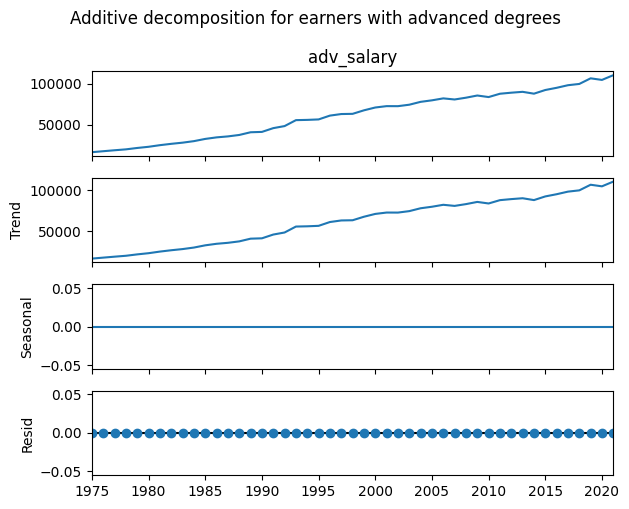

In [40]:
adv_salary_decomp.plot()
plt.suptitle("Additive decomposition for earners with advanced degrees", fontsize=12, y=1.05)

plt.show()